In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = "/Users/mervesenturk/Documents/UNIVERSITY DOCUMENTS/third year/neuro science project/allendata"

manifest_path = os.path.join(data_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [3]:
sessions = cache.get_session_table() #Returns a Pandas dataframe
sessions.head() #Sneak peek of the table

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [4]:
sessions.columns

Index(['published_at', 'specimen_id', 'session_type', 'age_in_days', 'sex',
       'full_genotype', 'unit_count', 'channel_count', 'probe_count',
       'ecephys_structure_acronyms'],
      dtype='object')

In [5]:
# Define filters
MIN_UNIT_COUNT = 500  # Minimum number of neurons recorded
PREFERRED_GENOTYPE = "wt/wt"  # Set to None if you want to include all genotypes

# Apply filtering
filtered_sessions = sessions[
    (sessions["unit_count"] >= MIN_UNIT_COUNT) &  # Select sessions with enough neurons
    (sessions["session_type"] == "brain_observatory_1.1")  # Ensure correct experiment type
]

# If genotype is a factor, filter further
if PREFERRED_GENOTYPE:
    filtered_sessions = filtered_sessions[filtered_sessions["full_genotype"] == PREFERRED_GENOTYPE]

# Sort sessions by unit count (descending order)
filtered_sessions = filtered_sessions.sort_values(by="unit_count", ascending=False)

# Display filtered sessions
print(f"Filtered {len(filtered_sessions)} sessions matching criteria")
print(filtered_sessions[["unit_count", "full_genotype", "ecephys_structure_acronyms"]])

Filtered 15 sessions matching criteria
           unit_count full_genotype  \
id                                    
757216464         959         wt/wt   
750332458         902         wt/wt   
742951821         893         wt/wt   
754829445         832         wt/wt   
732592105         824         wt/wt   
757970808         773         wt/wt   
750749662         761         wt/wt   
761418226         712         wt/wt   
744228101         659         wt/wt   
763673393         629         wt/wt   
739448407         625         wt/wt   
799864342         604         wt/wt   
737581020         568         wt/wt   
743475441         553         wt/wt   
754312389         502         wt/wt   

                                  ecephys_structure_acronyms  
id                                                            
757216464  [LP, DG, CA3, CA1, VISrl, nan, PO, LGd, HPF, V...  
750332458  [grey, VISrl, nan, VISal, IntG, IGL, LGd, CA3,...  
742951821  [VISal, nan, grey, VISl, VISrl, VI

In [6]:
# Find session 757216464 in the session table
session_id = 757216464

# Retrieve session properties
session_metadata = sessions.loc[session_id]

# Display session properties
print(session_metadata)

published_at                                               2019-10-03T00:00:00Z
specimen_id                                                           733457989
session_type                                              brain_observatory_1.1
age_in_days                                                               105.0
sex                                                                           M
full_genotype                                                             wt/wt
unit_count                                                                  959
channel_count                                                              2225
probe_count                                                                   6
ecephys_structure_acronyms    [LP, DG, CA3, CA1, VISrl, nan, PO, LGd, HPF, V...
Name: 757216464, dtype: object


In [7]:
# Extract key details
print(f"Session ID: {session_id}")
print(f"Number of Recorded Neurons: {session_metadata['unit_count']}")
print(f"Genotype: {session_metadata['full_genotype']}")
print(f"Brain Regions: {session_metadata['ecephys_structure_acronyms']}")
print(f"Session Type: {session_metadata['session_type']}")
print(f"Mouse Age (Days): {session_metadata['age_in_days']}")
print(f"Sex: {session_metadata['sex']}")

Session ID: 757216464
Number of Recorded Neurons: 959
Genotype: wt/wt
Brain Regions: ['LP' 'DG' 'CA3' 'CA1' 'VISrl' nan 'PO' 'LGd' 'HPF' 'VISal' 'TH' 'LGv'
 'VISl' 'MGm' 'SGN' 'ProS' 'SUB' 'VISp' 'Eth' 'APN' 'VIS' 'MRN' 'MB' 'NOT'
 'VISam']
Session Type: brain_observatory_1.1
Mouse Age (Days): 105.0
Sex: M


In [8]:
# Select the session ID
session_id = 757216464

# Download the session data
session_data = cache.get_session_data(session_id)

# Confirm it was downloaded
print(f"Session {session_id} successfully loaded!")


/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session 757216464 successfully loaded!


In [9]:
session_data.units

/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespa

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951812724,0.530584,165.705150,0.064669,0,237.67,6.884674,9.194248,0.016578,99.937016,0.000019,...,128.0,MRN,8292.0,3663.0,6645.0,probeA,See electrode locations,29999.957750,1249.998240,True
951812745,0.442866,190.595730,0.000315,2,261.61,5.568195,8.493725,0.095506,65.697146,0.002596,...,128.0,MRN,8285.0,3638.0,6650.0,probeA,See electrode locations,29999.957750,1249.998240,True
951812785,0.361222,134.263155,0.000120,6,206.92,5.579259,24.437194,0.000587,86.525032,0.008332,...,128.0,MRN,8274.0,3604.0,6655.0,probeA,See electrode locations,29999.957750,1249.998240,True
951812765,0.760445,124.347795,0.002866,4,331.84,5.722753,2.015055,0.019174,65.450579,0.000766,...,128.0,MRN,8277.0,3612.0,6654.0,probeA,See electrode locations,29999.957750,1249.998240,True
951812811,0.563871,89.634870,0.002207,9,169.08,5.157968,37.454772,0.005522,507.037686,0.005300,...,128.0,MRN,8259.0,3552.0,6663.0,probeA,See electrode locations,29999.957750,1249.998240,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951804296,0.210923,306.674160,0.001616,197,41.65,5.697925,0.687647,0.000000,64.966837,0.000495,...,417.0,VISrl,7418.0,1140.0,8734.0,probeF,See electrode locations,30000.029774,1250.001241,True
951804325,0.319148,99.954465,0.000092,202,134.30,4.619626,2.477649,0.006341,80.954185,0.000225,...,417.0,VISrl,7413.0,1123.0,8742.0,probeF,See electrode locations,30000.029774,1250.001241,True
951804346,0.417369,215.272590,0.001321,206,69.69,8.488513,0.376695,0.000000,92.507609,0.000001,...,417.0,VISrl,7408.0,1105.0,8750.0,probeF,See electrode locations,30000.029774,1250.001241,True


In [10]:
units = session_data.units

In [11]:
print(units["ecephys_structure_acronym"].unique())

['MRN' 'MB' 'APN' 'NOT' 'CA1' 'VISam' 'Eth' 'TH' 'DG' 'VIS' 'MGm' 'SGN'
 'LP' 'ProS' 'SUB' 'VISp' 'LGv' 'CA3' 'VISl' 'PO' 'LGd' 'VISal' 'VISrl']


In [12]:
# Check available stimulus
stimuli = session_data.stimulus_presentations["stimulus_name"].unique()
print(stimuli)

/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


['spontaneous' 'gabors' 'flashes' 'drifting_gratings'
 'natural_movie_three' 'natural_movie_one' 'static_gratings'
 'natural_scenes']


In [13]:
# Filter drifting_gratings / drifting_gratings_contrast trials
drifting = session_data.get_stimulus_table("drifting_gratings")
static = session_data.get_stimulus_table("static_gratings")

In [14]:
drifting.head()

,stimulus_block,start_time,stop_time,stimulus_name,contrast,phase,temporal_frequency,spatial_frequency,size,orientation,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3798,2.0,1586.113585,1588.115245,drifting_gratings,0.8,"[42471.86666667, 42471.86666667]",1.0,0.04,"[250.0, 250.0]",90.0,2.00166,246
3799,2.0,1589.116095,1591.117775,drifting_gratings,0.8,"[42471.86666667, 42471.86666667]",8.0,0.04,"[250.0, 250.0]",0.0,2.00168,247
3800,2.0,1592.118605,1594.120275,drifting_gratings,0.8,"[42471.86666667, 42471.86666667]",8.0,0.04,"[250.0, 250.0]",90.0,2.00167,248
3801,2.0,1595.121125,1597.122785,drifting_gratings,0.8,"[42471.86666667, 42471.86666667]",15.0,0.04,"[250.0, 250.0]",135.0,2.00166,249
3802,2.0,1598.123625,1600.125295,drifting_gratings,0.8,"[42471.86666667, 42471.86666667]",1.0,0.04,"[250.0, 250.0]",315.0,2.00167,250


In [28]:
print(len(static))
static.head()

6000


,stimulus_block,start_time,stop_time,stimulus_name,contrast,phase,spatial_frequency,size,orientation,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,
49434,8.0,5399.300205,5399.550405,static_gratings,0.8,0.5,0.32,"[250.0, 250.0]",0.0,0.250200,4787
49435,8.0,5399.550405,5399.800605,static_gratings,0.8,0.0,0.32,"[250.0, 250.0]",0.0,0.250200,4788
49436,8.0,5399.800605,5400.050805,static_gratings,0.8,0.5,0.04,"[250.0, 250.0]",90.0,0.250200,4789
49437,8.0,5400.050805,5400.301005,static_gratings,0.8,0.5,0.16,"[250.0, 250.0]",120.0,0.250200,4790
49438,8.0,5400.301005,5400.551212,static_gratings,0.8,0.25,0.08,"[250.0, 250.0]",90.0,0.250207,4791


### Preliminary Analysis

### ✅ Step 1: : COMPUTE SPIKE COUNTS


This code returns a matrix where each row represents a trial, each column represents a neuron, and the values are the number of spikes each neuron fired during that trial.  Previous studies in the field (Marshel et. al, 2012) showed that VISam is highly direction-selective and has a high response to low spatial frequency inputs.Compute Spike Counts per Trial

In [ ]:
def compute_spike_counts(session, stim_table, unit_ids, window=0.25):
    from collections import defaultdict
    import numpy as np

    spike_matrix = []
    for _, row in stim_table.iterrows():
        start, stop = row['start_time'], row['start_time'] + window
        trial_counts = []
        for unit in unit_ids:
            spikes = session.spike_times[unit]
            trial_counts.append(np.sum((spikes > start) & (spikes < stop)))
        spike_matrix.append(trial_counts)
    
    return np.array(spike_matrix)


In [20]:
visam_units = session_data.units[session_data.units["ecephys_structure_acronym"] == "VISam"].index.values

In [22]:
drifting_counts = compute_spike_counts(session_data, drifting, visam_units)

In [41]:
print(drifting_counts.shape)
drifting_counts

(630, 64)


array([[1, 2, 4, ..., 6, 0, 3],
       [2, 2, 1, ..., 5, 0, 2],
       [3, 3, 3, ..., 4, 0, 0],
       ...,
       [2, 2, 3, ..., 8, 0, 0],
       [1, 1, 3, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0]])

In [36]:
static_filtered = static[static["spatial_frequency"] == 0.04]
print(len(static_filtered))  # just to check how many trials remain

1159


In [39]:
static_count = compute_spike_counts(session_data, static_filtered, visam_units)

In [40]:
print(static_count.shape)
static_count

(1159, 64)


array([[2, 0, 3, ..., 7, 0, 1],
       [3, 2, 1, ..., 1, 0, 2],
       [3, 2, 2, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 2, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 1, 0]])

We extracted spike counts from 64 VISam neurons for 630 drifting and 1159 static grating trials (spatial frequency = 0.04).


### ✅ Step 2: : COMBINING TWO DATASETS(static and drifting)


In [43]:
drifting_data = drifting[['orientation', 'temporal_frequency', 'phase']].copy()
drifting_data['type'] = 'drifting'
drifting_data['spikes'] = list(drifting_counts)

static_data = static_filtered[['orientation', 'phase']].copy()
static_data['temporal_frequency'] = 0  # Static has no drift
static_data['type'] = 'static'
static_data['spikes'] = list(static_count)

combined = pd.concat([drifting_data, static_data], ignore_index=True)

In [44]:
combined

,orientation,temporal_frequency,phase,type,spikes
0,90.0,1.0,"[42471.86666667, 42471.86666667]",drifting,"[1, 2, 4, 8, 2, 0, 6, 4, 1, 3, 0, 0, 0, 0, 3, ..."
1,0.0,8.0,"[42471.86666667, 42471.86666667]",drifting,"[2, 2, 1, 4, 3, 2, 1, 1, 0, 1, 0, 0, 0, 2, 4, ..."
2,90.0,8.0,"[42471.86666667, 42471.86666667]",drifting,"[3, 3, 3, 4, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 6, ..."
3,135.0,15.0,"[42471.86666667, 42471.86666667]",drifting,"[3, 0, 2, 2, 3, 2, 1, 1, 0, 3, 0, 0, 0, 0, 3, ..."
4,315.0,1.0,"[42471.86666667, 42471.86666667]",drifting,"[2, 3, 3, 3, 0, 6, 0, 7, 0, 3, 0, 0, 0, 0, 6, ..."
...,...,...,...,...,...
1784,120.0,0,0.0,static,"[0, 1, 1, 0, 2, 4, 0, 1, 2, 11, 1, 0, 0, 0, 5,..."
1785,30.0,0,0.25,static,"[0, 0, 0, 0, 4, 0, 1, 0, 2, 8, 0, 0, 0, 0, 1, ..."
1786,60.0,0,0.5,static,"[0, 1, 0, 0, 1, 2, 1, 1, 1, 8, 0, 0, 0, 0, 3, ..."
1787,150.0,0,0.0,static,"[1, 2, 0, 0, 2, 0, 1, 2, 3, 4, 0, 0, 0, 2, 2, ..."


### ✅ Step 3: Preliminary Visualizations

#### 1. Spike rate vs Temporal Frequency

seeing variability of spiking counts, fixing two variables

In [79]:
import matplotlib.pyplot as plt

In [80]:
# Check what values are available
print("Orientations:", combined["orientation"].unique())
print("Phases:", combined["phase"].unique())
print("Temporal Frequencies:", combined["temporal_frequency"].unique())


Orientations: [90.0 0.0 135.0 315.0 225.0 'null' 180.0 270.0 45.0 150.0 60.0 30.0 120.0]
Phases: ['[42471.86666667, 42471.86666667]' '0.5' '0.75' '0.25' '0.0']
Temporal Frequencies: [1.0 8.0 15.0 'null' 2.0 4.0 0]


we have strange values in phase wıth a string list that doesnt make sense and a null temporal frequency

In [81]:
combined_clean = combined[
    ~combined["temporal_frequency"].isin(['null'])
].copy()

In [82]:
combined_clean["temporal_frequency"] = combined_clean["temporal_frequency"].astype(float)

In [83]:
combined_clean

,orientation,temporal_frequency,phase,type,spikes
0,90.0,1.0,"[42471.86666667, 42471.86666667]",drifting,"[1, 2, 4, 8, 2, 0, 6, 4, 1, 3, 0, 0, 0, 0, 3, ..."
1,0.0,8.0,"[42471.86666667, 42471.86666667]",drifting,"[2, 2, 1, 4, 3, 2, 1, 1, 0, 1, 0, 0, 0, 2, 4, ..."
2,90.0,8.0,"[42471.86666667, 42471.86666667]",drifting,"[3, 3, 3, 4, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 6, ..."
3,135.0,15.0,"[42471.86666667, 42471.86666667]",drifting,"[3, 0, 2, 2, 3, 2, 1, 1, 0, 3, 0, 0, 0, 0, 3, ..."
4,315.0,1.0,"[42471.86666667, 42471.86666667]",drifting,"[2, 3, 3, 3, 0, 6, 0, 7, 0, 3, 0, 0, 0, 0, 6, ..."
...,...,...,...,...,...
1784,120.0,0.0,0.0,static,"[0, 1, 1, 0, 2, 4, 0, 1, 2, 11, 1, 0, 0, 0, 5,..."
1785,30.0,0.0,0.25,static,"[0, 0, 0, 0, 4, 0, 1, 0, 2, 8, 0, 0, 0, 0, 1, ..."
1786,60.0,0.0,0.5,static,"[0, 1, 0, 0, 1, 2, 1, 1, 1, 8, 0, 0, 0, 0, 3, ..."
1787,150.0,0.0,0.0,static,"[1, 2, 0, 0, 2, 0, 1, 2, 3, 4, 0, 0, 0, 2, 2, ..."


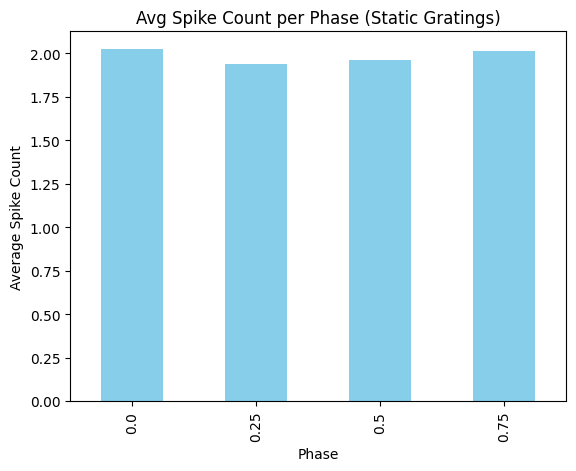

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by phase and average across trials and neurons
avg_spikes_per_phase = combined_clean[combined_clean["type"] == "static"].groupby("phase")["spikes"].apply(
    lambda x: np.mean(np.vstack(x), axis=0).mean()
)

# Bar plot
avg_spikes_per_phase.plot(kind="bar", color="skyblue")
plt.title("Avg Spike Count per Phase (Static Gratings)")
plt.ylabel("Average Spike Count")
plt.xlabel("Phase")
plt.show()


In [85]:
from scipy.stats import f_oneway

# Group spike counts by phase
grouped = combined_clean[combined_clean["type"] == "static"].groupby("phase")["spikes"].apply(list)

# Flatten spikes per trial and group them
phase_groups = [np.mean(np.vstack(trials), axis=1) for trials in grouped]

# Run ANOVA
f_stat, p_val = f_oneway(*phase_groups)
print(f"ANOVA result: F={f_stat:.2f}, p={p_val:.4f}")


ANOVA result: F=1.39, p=0.2458


✅ Phase is not statistically significant
The p-value = 0.2458 > 0.05, so we fail to reject the null hypothesis.

Conclusion: There's no strong evidence that phase has a significant effect on spike rates in your static gratings trials.

In [87]:
combined_clean = combined_clean.drop(columns=["phase"])
combined_clean

,orientation,temporal_frequency,type,spikes
0,90.0,1.0,drifting,"[1, 2, 4, 8, 2, 0, 6, 4, 1, 3, 0, 0, 0, 0, 3, ..."
1,0.0,8.0,drifting,"[2, 2, 1, 4, 3, 2, 1, 1, 0, 1, 0, 0, 0, 2, 4, ..."
2,90.0,8.0,drifting,"[3, 3, 3, 4, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 6, ..."
3,135.0,15.0,drifting,"[3, 0, 2, 2, 3, 2, 1, 1, 0, 3, 0, 0, 0, 0, 3, ..."
4,315.0,1.0,drifting,"[2, 3, 3, 3, 0, 6, 0, 7, 0, 3, 0, 0, 0, 0, 6, ..."
...,...,...,...,...
1784,120.0,0.0,static,"[0, 1, 1, 0, 2, 4, 0, 1, 2, 11, 1, 0, 0, 0, 5,..."
1785,30.0,0.0,static,"[0, 0, 0, 0, 4, 0, 1, 0, 2, 8, 0, 0, 0, 0, 1, ..."
1786,60.0,0.0,static,"[0, 1, 0, 0, 1, 2, 1, 1, 1, 8, 0, 0, 0, 0, 3, ..."
1787,150.0,0.0,static,"[1, 2, 0, 0, 2, 0, 1, 2, 3, 4, 0, 0, 0, 2, 2, ..."


In [92]:
print(combined_clean[combined_clean["type"] == "static"]["orientation"].unique())

[90.0 0.0 150.0 60.0 30.0 120.0]


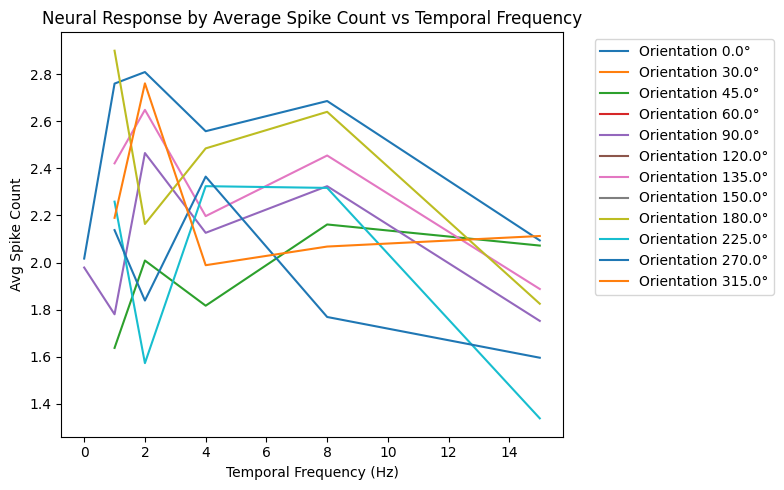

In [91]:
import matplotlib.pyplot as plt

# Clean up orientation values if necessary
orientations = sorted([o for o in combined_clean["orientation"].unique() if o != 'null'])

plt.figure(figsize=(8, 5))

for orient in orientations:
    # Mask for current orientation
    mask = (combined_clean["orientation"] == orient)
    subset = combined_clean[mask]

    # Temporal frequencies in this orientation
    freqs = sorted(subset["temporal_frequency"].unique())
    
    # Compute mean spike count (averaged across all neurons and trials)
    avg_spikes = []
    for f in freqs:
        trials = subset[subset["temporal_frequency"] == f]["spikes"]
        # Each "spikes" is an array → stack into 2D matrix
        spike_matrix = np.vstack(trials)
        avg_spikes.append(spike_matrix.mean())

    plt.plot(freqs, avg_spikes, label=f"Orientation {orient}°")

plt.xlabel("Temporal Frequency (Hz)")
plt.ylabel("Avg Spike Count")
plt.title("Neural Response by Average Spike Count vs Temporal Frequency")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



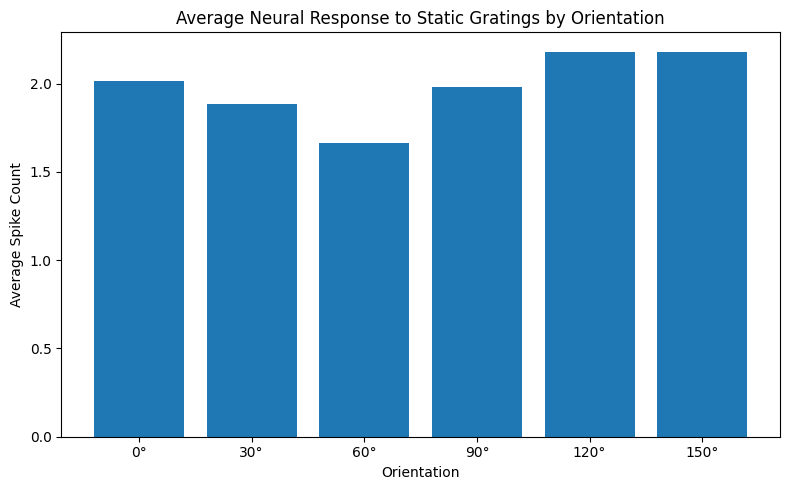

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Filter only static trials
static_data = combined_clean[combined_clean["temporal_frequency"] == 0.0]

# Step 2: Sort orientations numerically
orientations = sorted(static_data["orientation"].unique())

# Step 3: Compute average spike count for each orientation
avg_spikes = []
for orient in orientations:
    spikes = static_data[static_data["orientation"] == orient]["spikes"]
    spike_matrix = np.vstack(spikes)
    avg_spikes.append(spike_matrix.mean())

# Step 4: Plot
plt.figure(figsize=(8, 5))
plt.bar([f"{int(o)}°" for o in orientations], avg_spikes)
plt.xlabel("Orientation")
plt.ylabel("Average Spike Count")
plt.title("Average Neural Response to Static Gratings by Orientation")
plt.tight_layout()
plt.show()



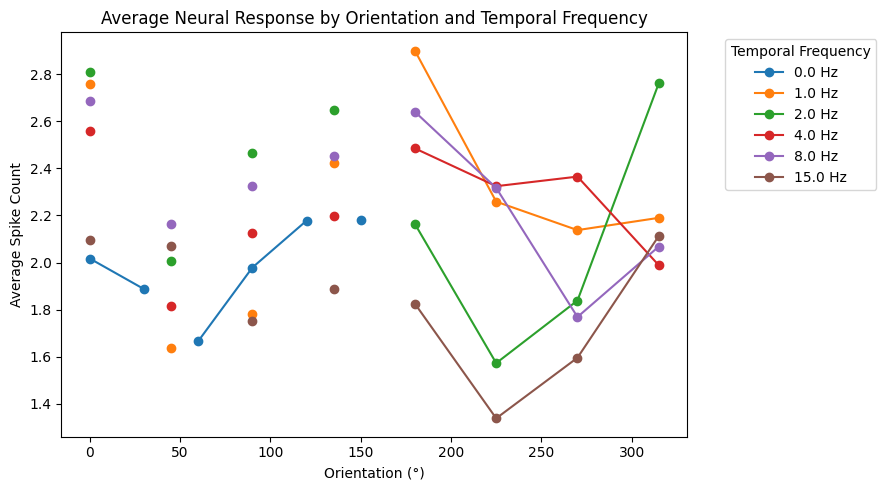

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get sorted unique values
orientations = sorted(combined_clean["orientation"].unique())
temporal_freqs = sorted(combined_clean["temporal_frequency"].unique())

# Step 2: Compute avg spike for each (orientation, freq) pair
plt.figure(figsize=(9, 5))

for freq in temporal_freqs:
    avg_spikes = []
    for orient in orientations:
        mask = (combined_clean["orientation"] == orient) & (combined_clean["temporal_frequency"] == freq)
        spikes = combined_clean[mask]["spikes"]
        if len(spikes) > 0:
            spike_matrix = np.vstack(spikes)
            avg_spikes.append(spike_matrix.mean())
        else:
            avg_spikes.append(np.nan)  # in case that combination doesn't exist

    plt.plot(orientations, avg_spikes, marker='o', label=f"{freq} Hz")

# Step 3: Format plot
plt.xlabel("Orientation (°)")
plt.ylabel("Average Spike Count")
plt.title("Average Neural Response by Orientation and Temporal Frequency")
plt.legend(title="Temporal Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


1 Hz and 2 Hz: Higher and more variable responses across orientations.

Some orientations (e.g., around 0° and 180°) show peaks for multiple frequencies.

Suggests tuning to both speed and orientation: the neuron populations respond more selectively when the stimulus is moving.